# NYC Teacher Salary Analysis

## Executive Summary

## Background



In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
pd.set_option('display.max_rows', 50)

import warnings
warnings.filterwarnings('ignore')
# plt.style.use('tableau-colorblind10')

## Acquire
Data: [NYC Citywide Payroll Data (Fiscal Year)](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e)<br>

Let's acquire the prepared teachers payroll data from our file, `./data/teachers_payroll.parquet`.


In [2]:
# Load the prepared teachers salaries
df = read_and_filter_data()

In [3]:
# Let's check out the data's size, columns, and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410968 entries, 0 to 410967
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Fiscal Year                             410968 non-null  Int16         
 1   Employee ID                             410968 non-null  object        
 2   Hire Date                               410968 non-null  datetime64[ns]
 3   Hire Year                               410968 non-null  Int16         
 4   Years of Employment                     410968 non-null  Int16         
 5   Employment Category                     410968 non-null  category      
 6   Salary                                  410968 non-null  Int32         
 7   Additional Pay                          401615 non-null  float64       
 8   UFT Dues                                410968 non-null  float64       
 9   Net Salary                           

In [4]:
# Let's take a look at an individual record
df.sample(1).T

,260608
Fiscal Year,2016
Employee ID,48609
Hire Date,1982-02-01 00:00:00
Hire Year,1982
Years of Employment,34
Employment Category,6+
Salary,105604
Additional Pay,0.0
UFT Dues,1346.4
Net Salary,104257.6


In [5]:
# Let's look at the summary statistics of our numeric features.
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,410968.0,2019.0,2015.0,2017.0,2019.0,2021.0,2023.0,3.0
Hire Date,410968,2004-09-30 23:43:59.434700288,1955-09-09 00:00:00,1999-02-02 00:00:00,2004-09-07 00:00:00,2012-09-04 00:00:00,2022-05-20 00:00:00,NaN
Hire Year,410968.0,2004.0,1955.0,1999.0,2004.0,2012.0,2022.0,9.0
Years of Employment,410968.0,15.0,1.0,8.0,15.0,21.0,65.0,8.0
Salary,410968.0,93399.0,49908.0,79655.0,93753.0,106058.0,148657.0,18373.0
Additional Pay,401615.0,2197.0,0.0,0.0,0.0,3056.0,94467.0,4041.0
UFT Dues,410968.0,1434.0,1295.0,1373.0,1431.0,1497.0,1572.0,84.0
Net Salary,410968.0,91965.0,48613.0,78359.0,92289.0,104527.0,147160.0,18341.0
Previous Salary,410968.0,88776.0,44182.0,75218.0,88984.0,102009.0,148657.0,18786.0
Total Pay,401615.0,95627.0,49908.0,81484.0,94198.0,109601.0,203242.0,20282.0


In [6]:
# Let's take a look at the summary statistics for our categorical features.
df.select_dtypes(include='category').describe().T

,count,unique,top,freq
Employment Category,410968,2,6+,340723
Salary Category,410968,5,80k-100k,156008
Contract Period,410968,3,2009-2018,182684
Additional Pay Category,401615,3,$0,210569
Salary Delta Category,410966,4,0-5%,167440
Delta Category,410966,2,Salary Increased,366395
Compensation Category,407593,2,Compensation Increased,396971
Salary Monetary Diff Category,410968,4,0-$5k,230043


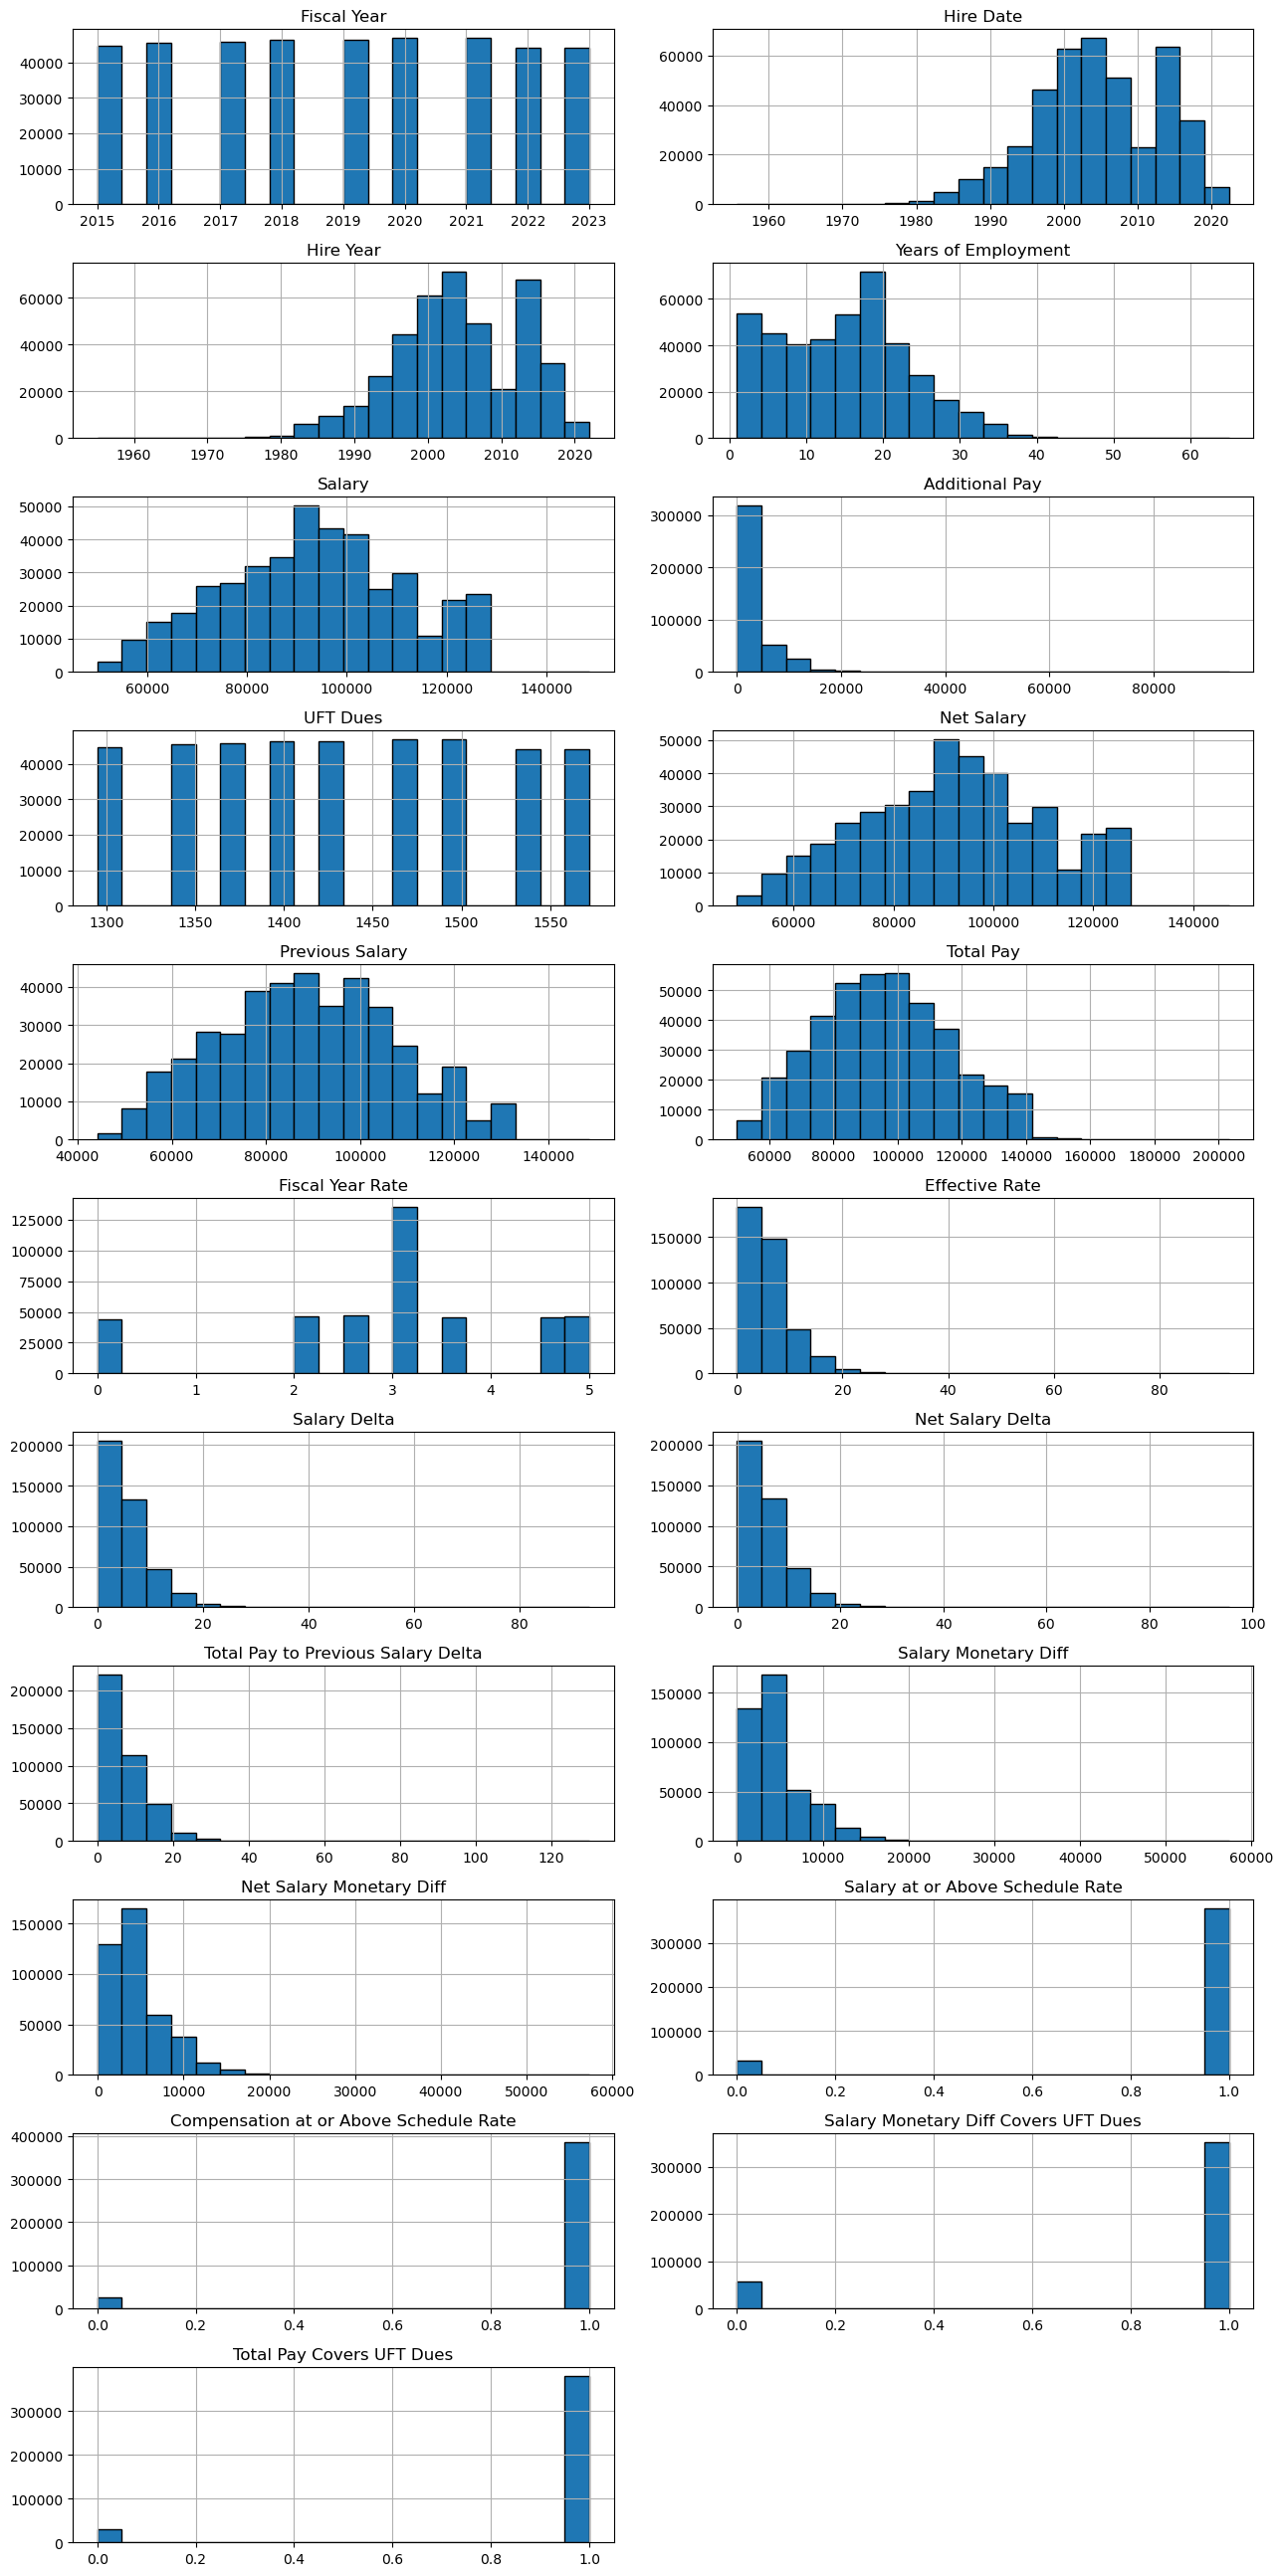

In [7]:
# Let's visualize the distributions of our numeric features.
df.hist(figsize=(13,26), ec='black', layout=(11, 2), bins=20)
plt.tight_layout();

### Inital Findings
- Each record represents a teacher's salary for a given `fiscal year`.
    - A `fiscal year` starts on July 1st and ends on June 30th of the following years.
- There are more than 40K teacher salaries each year.
- There are 410,968 teacher salaries from 2015 - 2023.
- Most teachers were hired in the early 2000's with an average tenure of 15 years.
    - 25th percentile of teachers have tenure of 8 years.
    - Bimodal distribution of teachers hired in the early 2000's and mid-2010's
- Most teachers salaries range from $80K to $100K
    - Teachers most commonly earn $0 in `additional pay`.
- Teachers most commonly:
    - Earn a higher `salary` year over year.
    - Earn a higher `total pay` year over year.
        - `Total pay` is equal to `salary` + `additional pay`.
    - Earn a year over year salary monetary increase of $0-$5K.
    - Earn a 0-5% increase in salary year over year, measured by `Salary Delta`
- United Federation of Teachers Union dues increase over time.   
- Teachers most commonly earn more than the yearly schedule rate, taking UFT dues into account.

## Exploratory Data Analysis

In [8]:
df_headcount = df.groupby('Fiscal Year').size()

<Axes: xlabel='Fiscal Year'>

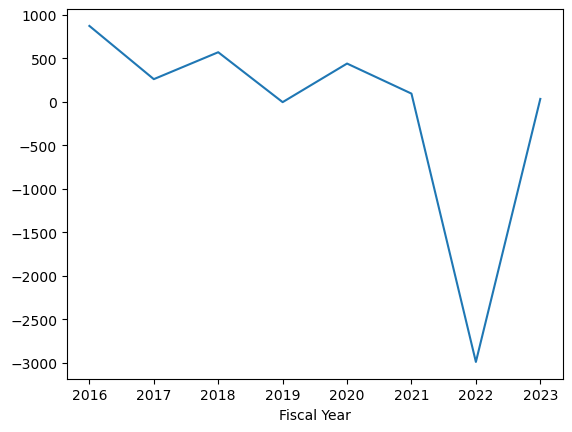

In [9]:
df_headcount.diff().plot(kind='line')

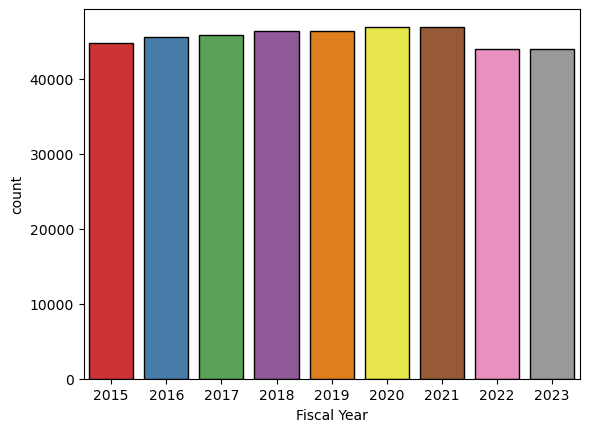

In [10]:
sns.countplot(x=df['Fiscal Year'],
              palette='Set1',
              ec='black');

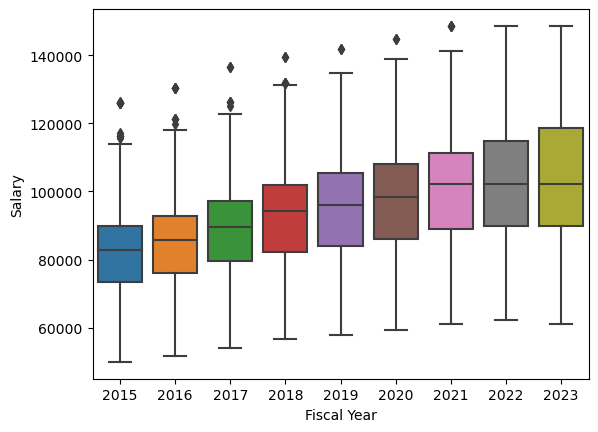

In [11]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

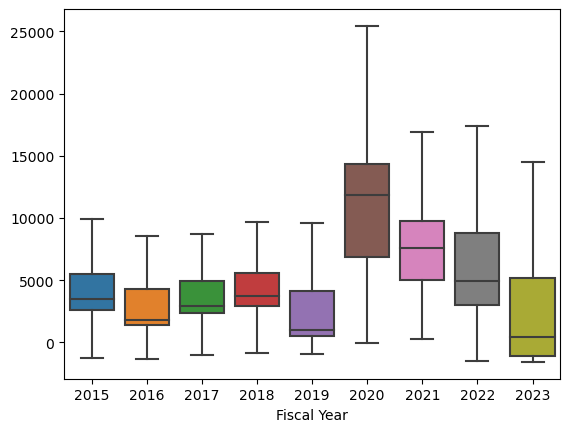

In [12]:
sns.boxplot(data=df, y=df['Additional Pay']+df['Salary Monetary Diff']-df['UFT Dues'], x='Fiscal Year',showfliers=False);

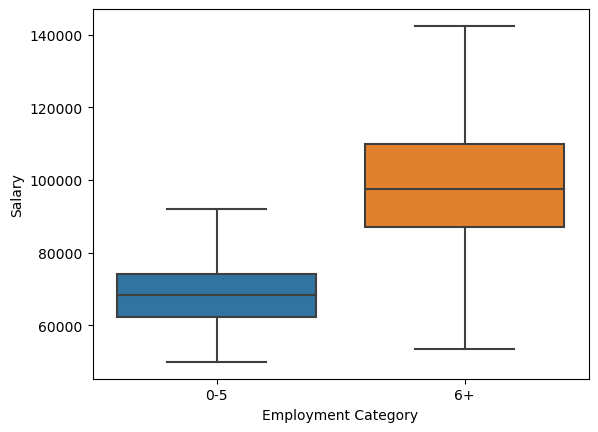

In [13]:
sns.boxplot(data=df, y='Salary', x='Employment Category',showfliers=False);

In [14]:
df_2022 = df[(df['Fiscal Year']==2022)]
df_2023 = df[(df['Fiscal Year']==2023)]
df_2022_no_change = df[(df['Fiscal Year']==2022)&(df['Delta Category']=='No Change')]
df_2023_no_change = df[(df['Fiscal Year']==2023)&(df['Delta Category']=='No Change')]

In [15]:
pd.crosstab(df_2022['Employment Category'],df_2022['Delta Category'])

Delta Category,No Change,Salary Increased
Employment Category,,
0-5,677,4892
6+,21366,17048


In [16]:
pd.crosstab(df_2023['Employment Category'],df_2023['Delta Category'])

Delta Category,No Change,Salary Increased
Employment Category,,
0-5,603,4987
6+,21923,16502


In [17]:
df_delta_bar = df.groupby('Fiscal Year')['Delta Category']\
                 .value_counts(normalize=True)\
                 .round(2).reset_index()

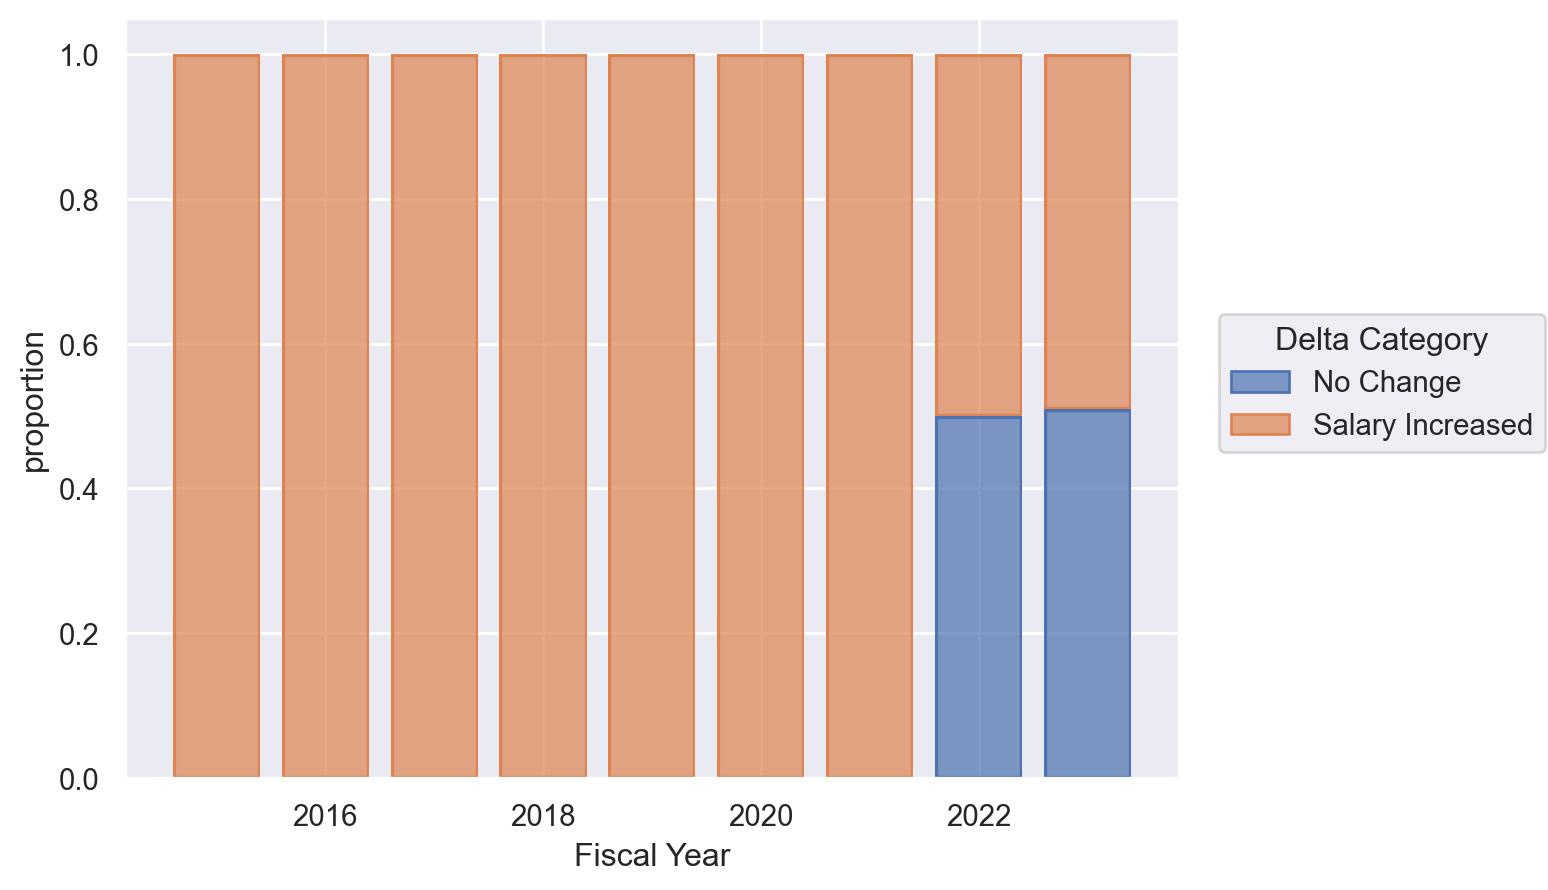

In [18]:
(
    so.Plot(data=df_delta_bar, x='Fiscal Year', y='proportion', color='Delta Category')
    .add(so.Bar(), so.Stack())
)

In [19]:
df_comp_bar = df.groupby('Fiscal Year')['Compensation at or Above Schedule Rate']\
                .value_counts(normalize=True)\
                .round(2).reset_index()

In [20]:
df_comp_bar['Compensation at or Above Schedule Rate'] = (
    np.where(df_comp_bar['Compensation at or Above Schedule Rate']!=0,'At or Above','Below')
)

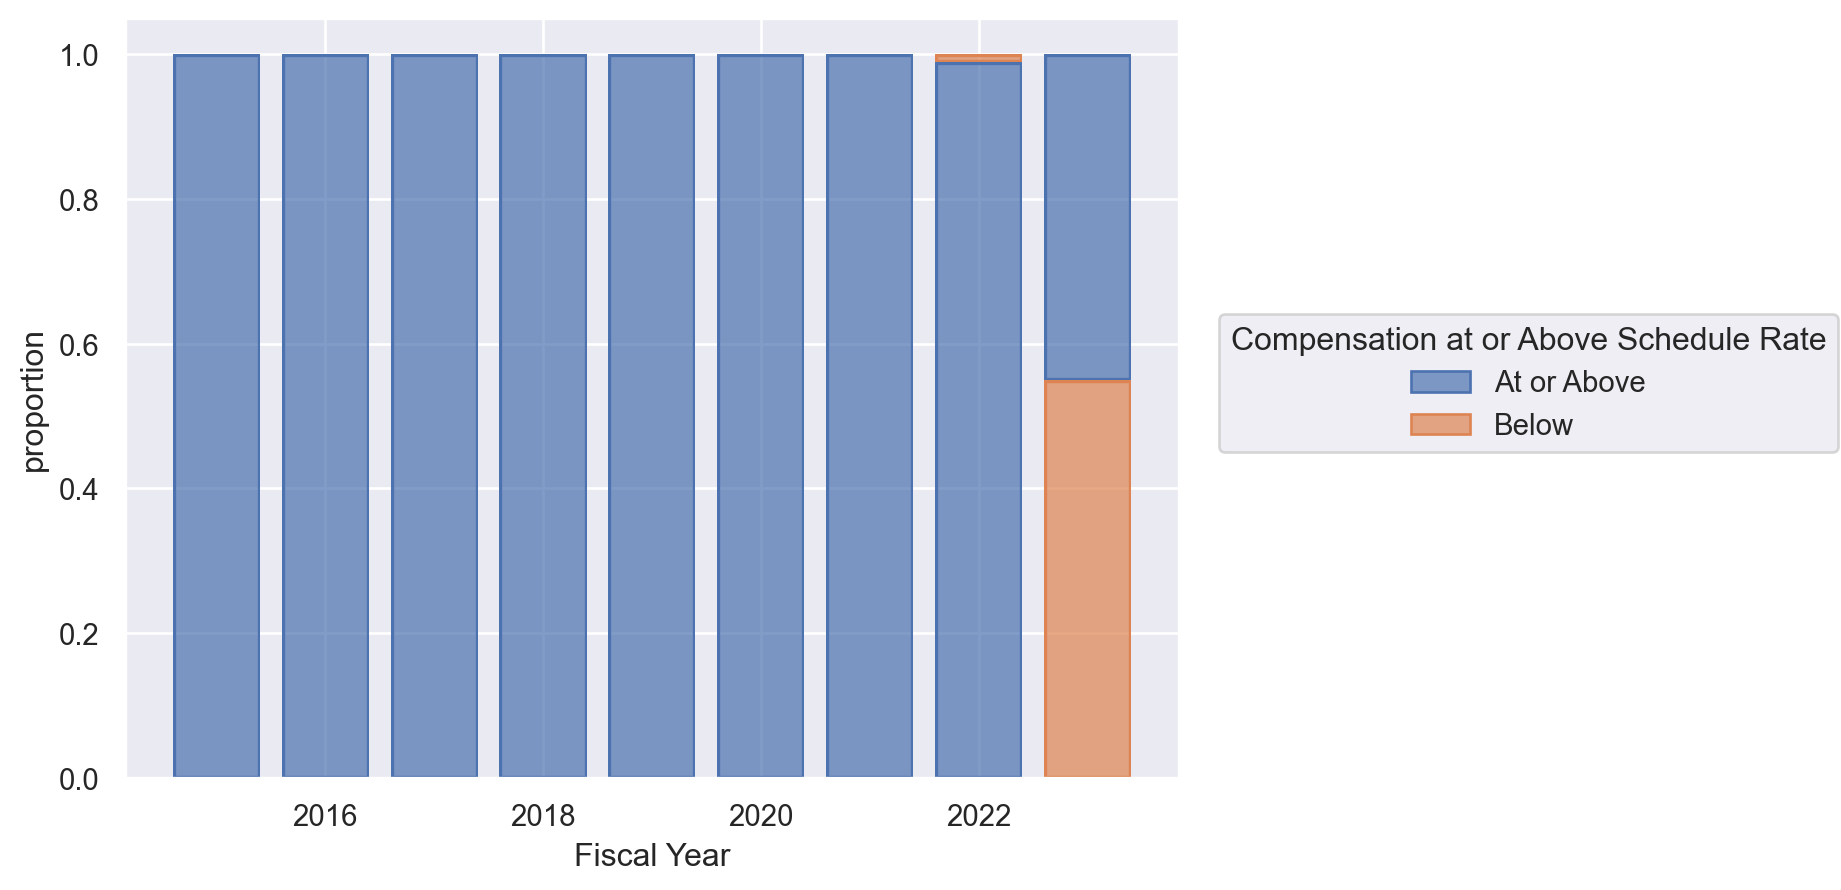

In [21]:
(
    so.Plot(data=df_comp_bar, x='Fiscal Year', y='proportion', color='Compensation at or Above Schedule Rate')
    .add(so.Bar(), so.Stack())
)

In [29]:
df_rate_summary = df[df['Fiscal Year']>=2015].groupby(by=['Employment Category','Fiscal Year'])\
                    .agg({'Fiscal Year Rate': 'median',
                          'Effective Rate':'median',
                          'Salary Delta': 'median'
                          }).round(2)
df_rate_summary.columns = df_rate_summary.columns.get_level_values(0)
df_rate_summary = df_rate_summary.groupby(level=0).cumsum()
df_rate_summary = df_rate_summary.reset_index(col_level=-1)

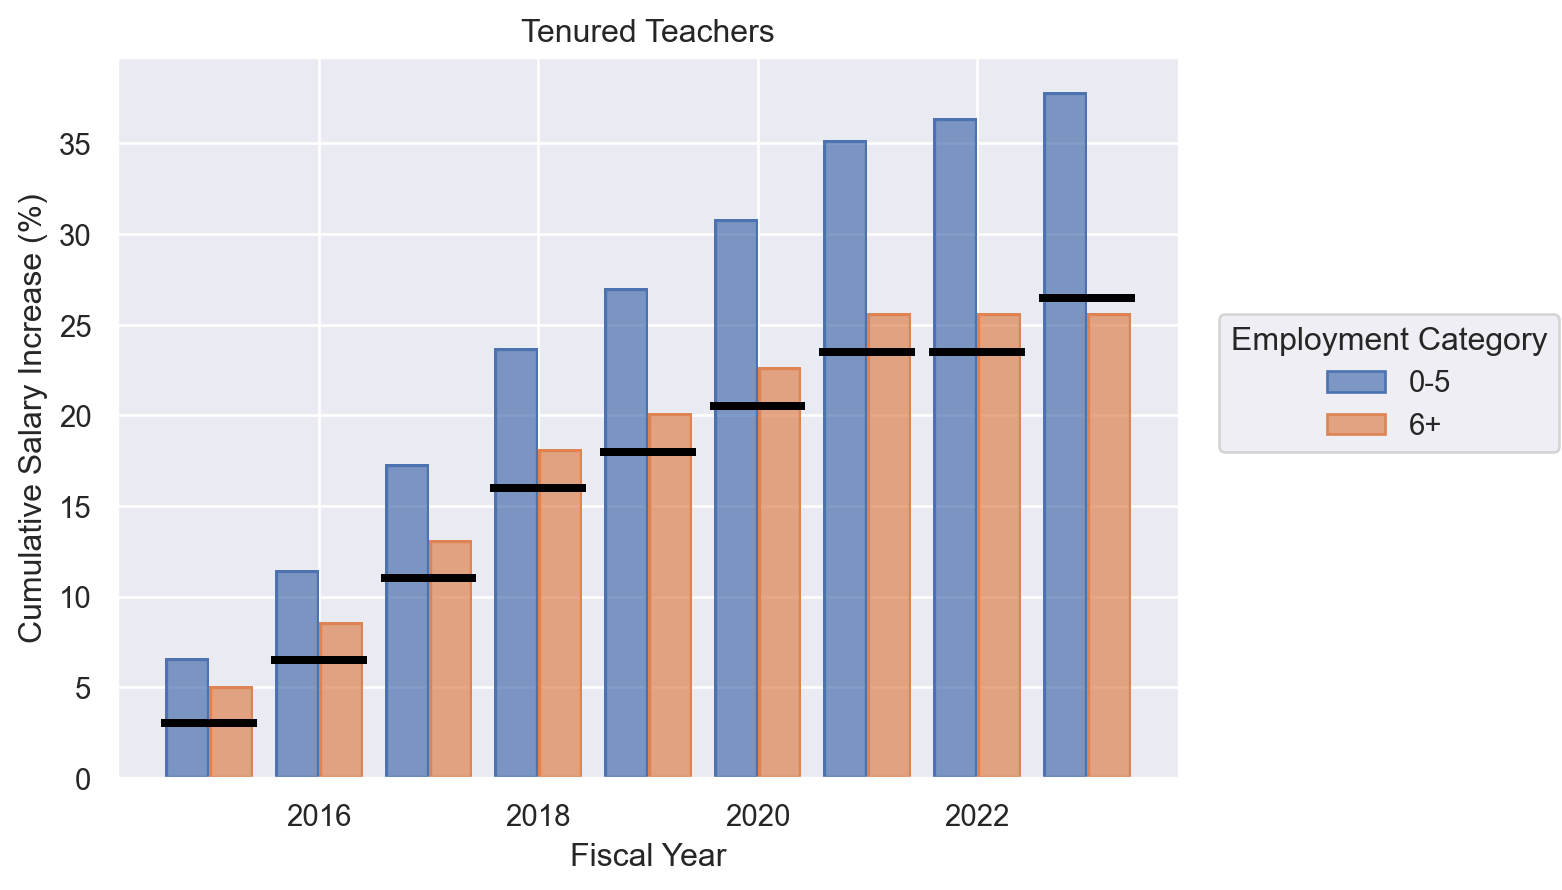

In [30]:
p1 = (
    so.Plot(data=df_rate_summary, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Salary Delta', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Fiscal Year',
           y='Cumulative Salary Increase (%)',
           title='Tenured Teachers')
)
p1

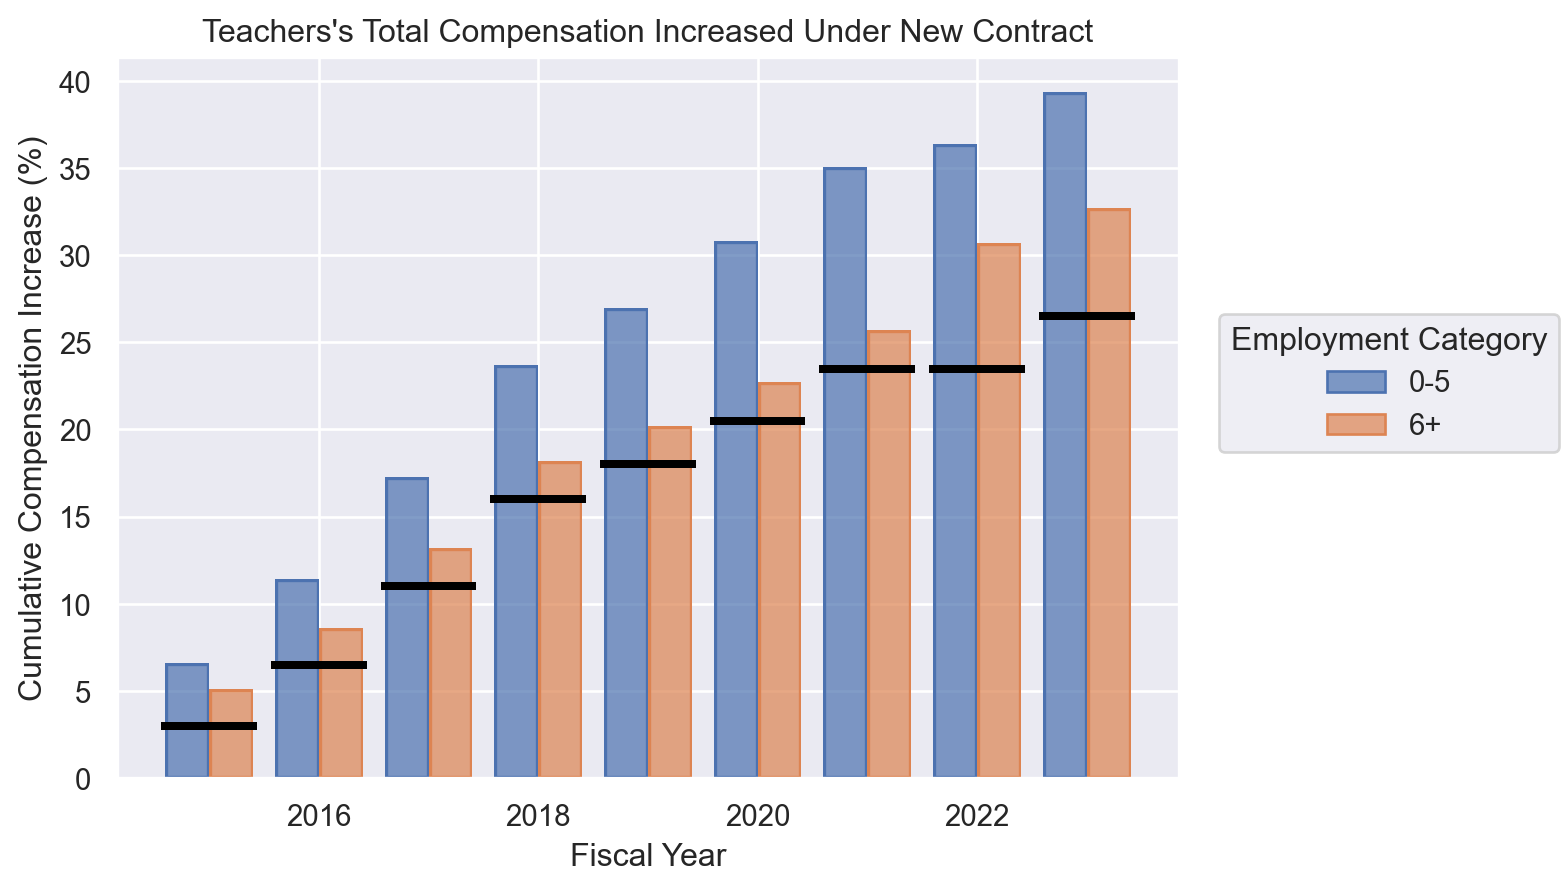

In [32]:
p2 = (
    so.Plot(data=df_rate_summary, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Effective Rate', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Fiscal Year',
           y='Cumulative Compensation Increase (%)',
           title='Teachers\'s Total Compensation Increased Under New Contract')
)
p2

In [36]:
df_rate_summary_yoy = df[df['Fiscal Year']>=2015].groupby(by=['Employment Category','Fiscal Year'])\
                    .agg({'Fiscal Year Rate': 'median',
                          'Effective Rate':'median',
                          'Salary Delta': 'median'
                          }).round(2)
df_rate_summary_yoy.columns = df_rate_summary_yoy.columns.get_level_values(0)
df_rate_summary_yoy = df_rate_summary_yoy.reset_index(col_level=-1)

In [37]:
df_rate_summary_yoy

,Employment Category,Fiscal Year,Fiscal Year Rate,Effective Rate,Salary Delta
0,0-5,2015,3.0,6.6,6.61
1,0-5,2016,3.5,4.8,4.83
2,0-5,2017,4.5,5.9,5.90
3,0-5,2018,5.0,6.4,6.37
4,0-5,2019,2.0,3.3,3.32
5,0-5,2020,2.5,3.8,3.82
6,0-5,2021,3.0,4.3,4.33
7,0-5,2022,0.0,1.3,1.23
8,0-5,2023,3.0,3.0,1.45
9,6+,2015,3.0,5.1,5.09


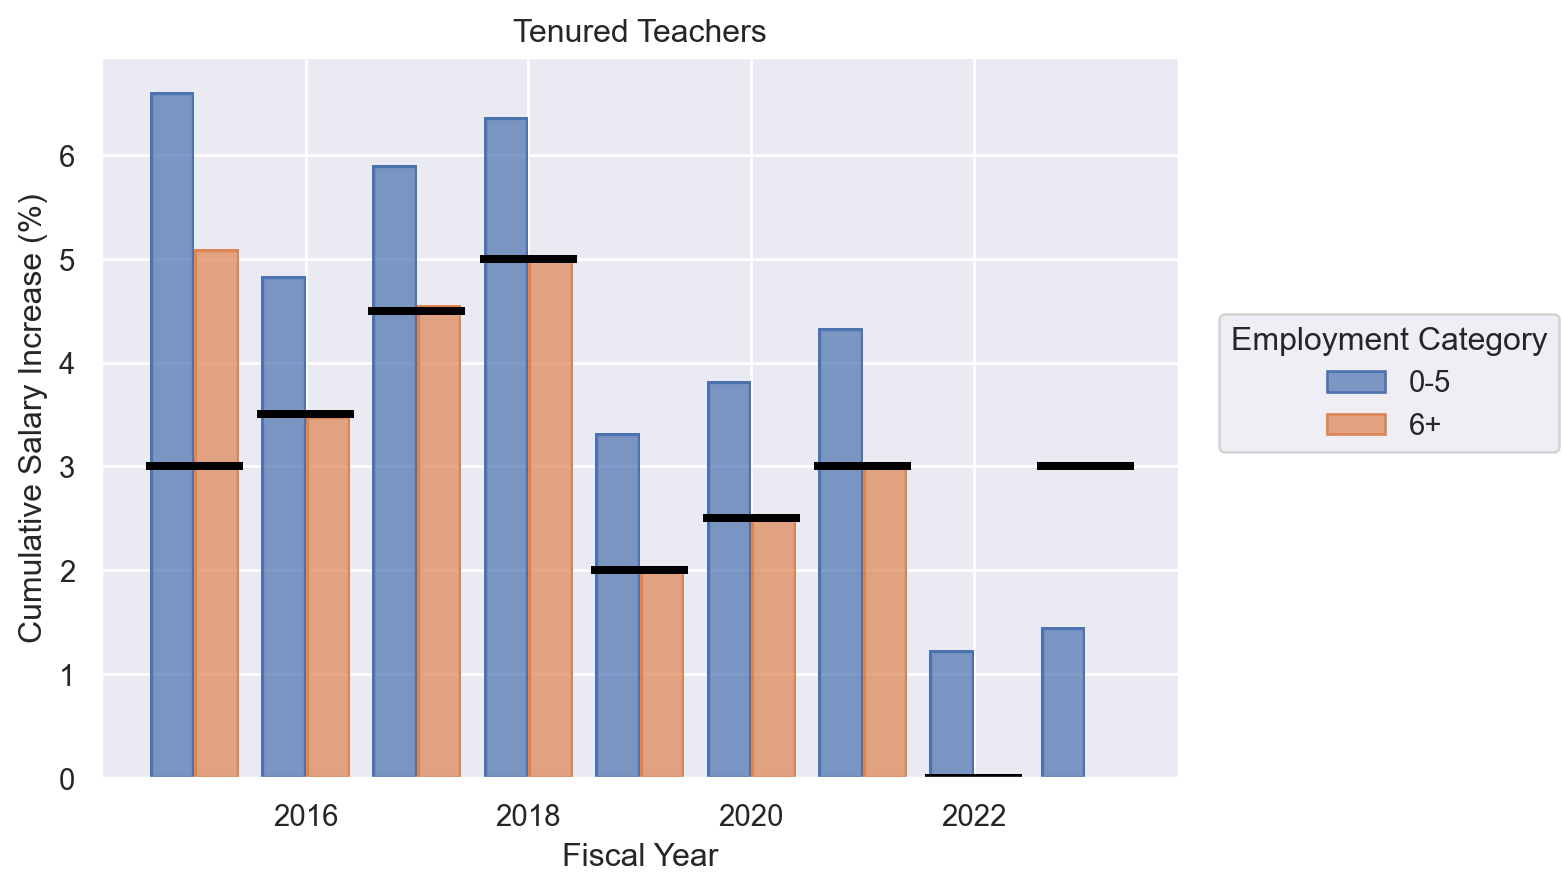

In [38]:
p3 = (
    so.Plot(data=df_rate_summary_yoy, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Salary Delta', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Fiscal Year',
           y='Cumulative Salary Increase (%)',
           title='Tenured Teachers')
)
p3

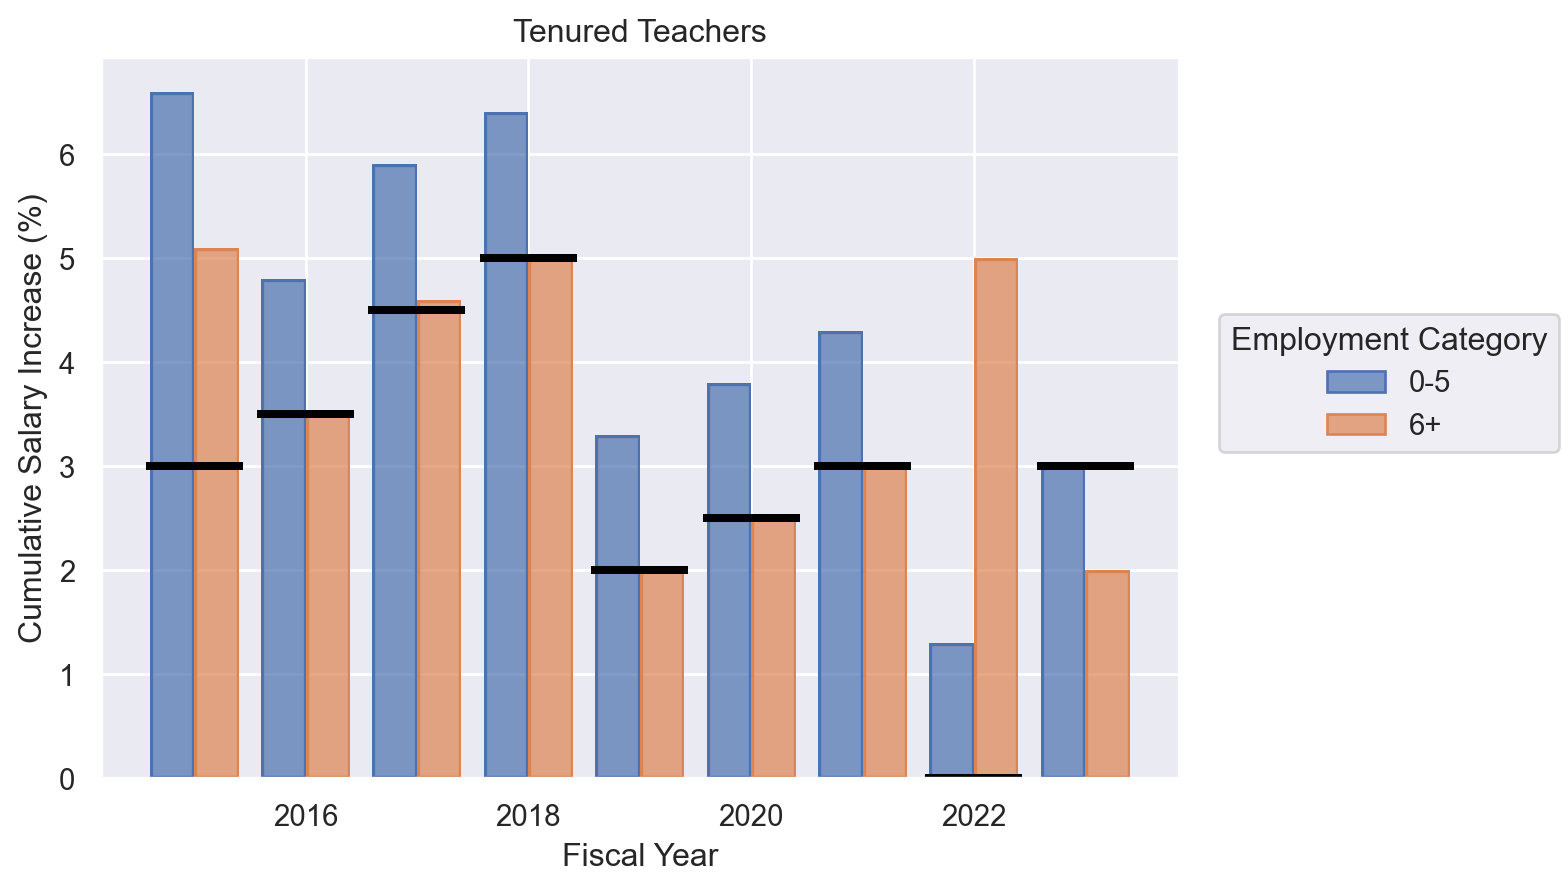

In [39]:
p4 = (
    so.Plot(data=df_rate_summary_yoy, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Effective Rate', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Fiscal Year',
           y='Cumulative Salary Increase (%)',
           title='Tenured Teachers')
)
p4

In [25]:
# sns.countplot(data=df,
#               x='Fiscal Year',
#               hue='Salary Monetary Diff Covers UFT Dues');

# sns.countplot(data=df,
#               x='Fiscal Year',
#               hue='Total Pay Covers UFT Dues');

# sns.scatterplot(data=df_2023, x='Additional Pay', y='Salary Monetary Diff', hue='Total Pay Covers UFT Dues');

In [26]:
# h_test_1 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# h_test_2 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# h_test_3 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# h_test_4 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# h_test_5 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))
# h_test_6 = stats.chi2_contingency(pd.crosstab(df_2021_to_2023['Degree'], df_2021_to_2023['Salary Simplified Delta Category']))